# **Laboratorio 5**
## **Parte 2**

- Derek Arreaga - 22537
- Paula Barillas - 22764
- Mónica Salvatierra - 22249

source
El umbral teórico p = 1/n para n = 200 es 0.005, y la simulación concuerda con esa predicción en el sentido de que la formación del componente gigante comienza alrededor de p ≈ 0.005. Sin embargo, la fracción media alcanza valores dominantes un poco más tarde (p ≈ 0.007–0.008) debido a efectos de tamaño finito y a la variabilidad entre realizaciones: por ejemplo, la desviación estándar en p = 0.006 es relativamente alta (~0.12), lo que indica que en esa región algunas realizaciones ya tienen componente gigante y otras no; por eso es importante mostrar bandas de incertidumbre además de la media.
En un contexto real como una epidemia, cruzar este umbral equivale a pasar de brotes locales a la posibilidad de una epidemia generalizada que involucre una fracción macroscópica de la población. Esto implica alta sensibilidad a pequeños cambios en el parámetro de transmisión: en nuestros datos aumentar p de 0.006 a 0.008 eleva la media del gigante de ≈0.30 a ≈0.62, es decir, un cambio pequeño en p dobla la fracción afectada en promedio en esa zona crítica. Las políticas preventivas deben por tanto centrarse en mantener el parámetro efectivo por debajo del umbral (reducción de contactos, vacunación) y en identificar/enfriar enlaces puente entre comunidades cuando el sistema está cerca de la transición.
Si desea, puedo (a) añadir al gráfico el p_crit empírico (el p donde la media ≈ 0.5) y ejecutar la celda para mostrarlo, o (b) aumentar la resolución de ps_fine y/o el número de realizaciones N para estimar p_crit con más precisión; indíqueme cuál opción prefiere.

2. El modelo de Barabási-Albert asume dos condiciones clave: (1) la red está en constante crecimiento y (2) los nuevos nodos se conectan con preferencia a los nodos más conectados. Describa un ejemplo de una red del mundo real donde al menos una de estas dos suposiciones no se cumpla. Explique por qué el modelo Barabási-Albert sería una representación inadecuada para esa red.

Un ejemplo de red donde puede no aplicarse del todo las condiciones del modelo de Barabási-Albert es en una **red de metro** en una ciudad antigua.

- **1. Red en constante crecimiento**:

    En el caso de una red de metro, llega un punto donde el crecimiento es limitado o incluso se detiene. No suelen haber nuevas estaciones o líneas muy frecuentemente ya sea por espacio o costos.

- **2. Conexión preferencial restringida**:

    Si bien en una red de metro las estaciones centrales tienden a tener más conexiones,las nuevas estaciones no necesariamente estarán conectadas a estas por preferencia. Por ejemplo si se construye una nueva estación en un área para mejorar la accesibilidad local, esta se conectará a una estación menos concurrida en lugar de una central. Y así es como se puede contradecir la idea de conexión preferencial.

El modelo **Barabási-Albert** es inadecuado para esta red ya que en el caso de los metros se suele tener una topología relativamente fija y no se espera un crecimiento constante. Además, el grado de conexiones de un nodo estará limitado físicamente, contradiciendo la condición de que los nodos nuevos se conectan con preferencia a los más concurridos.


3. En el modelo de Watts-Strogatz, el parámetro de recableado p es la clave para sintonizar la red entre orden y aleatoriedad. **Describa qué sucede con el coeficiente de agrupamiento promedio** y la **longitud de camino promedio** de la red a medida que p varía desde 0 hasta 1. ¿Por qué un valor de p muy pequeño (ej. 0.01) es tan efectivo para reducir drásticamente la longitud del camino promedio sin destruir el agrupamiento local?

- Cuando $p$ varía de 0 a 1:
    - $(p = 0)$ (anillo regular):
        * **Alto coeficiente de agrupamiento** (clustering local fuerte).
        * **Larga longitud de camino promedio** (camino típico entre dos nodos es grande).
    - $0 < p \ll 1$ (pequeño recableado):
        * **Coeficiente de agrupamiento** se mantiene alto o disminuye muy poco.
        * **Longitud de camino promedio** cae **drásticamente** (se introducen atajos).
        * Resultado: *mundo pequeño* — combinación de clustering y caminos cortos.
    - $p \approx 1$ (red aleatoria):
        * **Bajo clustering**.
        * **Longitud de camino promedio** muy corto (propio de redes aleatorias).

Un $p$ muy pequeño reduce fuertemente la distancia sin destruir el clustering porque:
- Un pequeño número de aristas "recableadas" crea atajos que conectan regiones lejanas del anillo regular.
- Esos atajos acortan enormemente las rutas típicas porque permiten saltar grandes tramos localmente.
- Como solo unas pocas aristas cambian, la mayoría de la estructura local permanece intacta, por eso el **clustering** se conserva mientras la **distancia promedio** se reduce mucho.
-  Intuitivo: unas pocas autopistas entre barrios reducen tiempos de viaje sin eliminar las calles locales.




4. Piense en la red de amistades dentro de una red social como Facebook o Instagram. Esta red muestra características de varios modelos: tiene comunidades muy unidas (grupos de la universidad, compañeros de trabajo), lo que sugiere un modelo de mundo pequeño. Al mismo tiempo, tiene "influencers" o celebridades con millones de seguidores, lo que es característico de una red libre de escala. ¿Cómo podría un modelo de simulación capturar ambas propiedades? Proponga una regla generativa conceptual (no necesita escribir
código) para construir una red que sea a la vez comunitaria y tenga hubs



- Para construir redes que tengan **comunidades muy cohesionadas** y, a la vez, **hubs** con gran grado, como en el caso de influencers, conectando muchas comunidades, se puede seguir la siguiente estructura:


1. **Generar comunidades locales (bloques densos)**

   * Partir la población en $k$ comunidades, como universidades, empresas, condominios.
   * Dentro de cada comunidad, conectar nodos con probabilidad alta, Creando un alto clustering local.

2. **Introducir unos pocos nodos con potencial de hub**

   * Seleccionar aleatoriamente o por distribución un conjunto pequeño de nodos candidatos a *influencers*.
   * Para cada nuevo nodo influencer, conectar **preferencialmente** hacia nodos ya con alto grado global pero permitiendo conexiones hacia múltiples comunidades con un puente inter-bloques.

3. **Añadir enlaces inter-comunidad**

   * Con baja probabilidad crear enlaces aleatorios entre nodos de distintas comunidades, creando atajos al estilo mundo pequeño.
   * Además, forzar que los influencers tengan una probabilidad elevada de conectar a nodos en todas las comunidades generando hubs globales.

4. **Iteración y balance**

   * Repetir la adición de nodos y enlaces hasta alcanzar tamaño deseado. Ajustar las probabilidades para controlar la densidad interna, número de puentes y presencia de hub.

Esta estructura captura ambas propiedades por:

* Los **poblados densos** dentro de bloques generan el **clustering/comunidades** observado.
* Las conexiones preferenciales y la regla que permite a ciertos nodos (influencers) conectarse a muchas comunidades generan **hubs globales** que replican la cola pesada de grados.
* La pequeña probabilidad de crear enlaces aleatorios entre distintas comunidades y la presencia selectiva de hubs mantiene caminos cortos entre comunidades (característica de mundo pequeño).

### **Práctica**

#### **Problema 1**

#### **Importación de librerías**

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

rng = np.random.default_rng(16)

n = 200
ps = np.linspace(0.0, 0.1, 100)  
sizes_norm = []                   # tamaño normalizado del componente gigante

#### **Bucle sobre p y cálculo del componente gigante**

In [2]:
for p in ps:
    G = nx.erdos_renyi_graph(n=n, p=p, seed=int(rng.integers(0, 1e9)))
    
    # componentes conectados 
    comps = nx.connected_components(G)            
    giant = max(comps, key=len, default=set())    
    sizes_norm.append(len(giant) / n)

#### **Gráfica y umbral teórico**

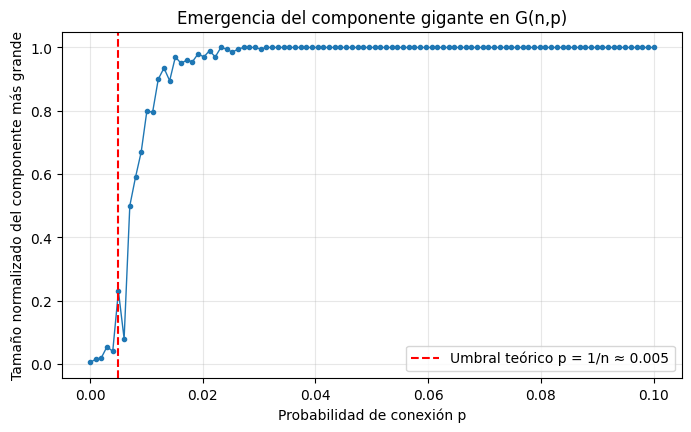

In [3]:
pc = 1 / n

plt.figure(figsize=(8,4.5))
plt.plot(ps, sizes_norm, marker='o', ms=3, lw=1)
plt.axvline(pc, linestyle='--', linewidth=1.5, color='red', label=f'Umbral teórico p = 1/n ≈ {pc:.3f}')
plt.title('Emergencia del componente gigante en G(n,p)')
plt.xlabel('Probabilidad de conexión p')
plt.ylabel('Tamaño normalizado del componente más grande')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Promedio y bandas de error alrededor del umbral
A continuación se calcula la media y la desviación estándar del tamaño del componente gigante sobre varias realizaciones para una malla fina de p alrededor de p = 1/n. Esto permite visualizar la variabilidad estocástica y confirmar el punto de transición con bandas de error.

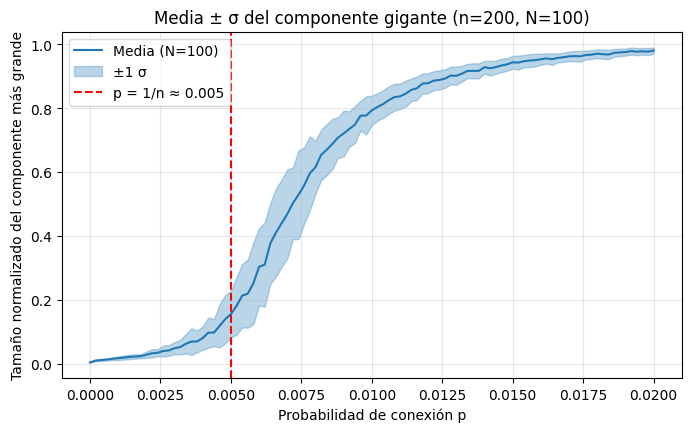

p	mean	std
0.00000	0.0050	0.0000
0.00200	0.0290	0.0097
0.00400	0.0813	0.0365
0.00600	0.3044	0.1213
0.00800	0.6158	0.0829
0.01000	0.7938	0.0463
0.01200	0.8788	0.0314
0.01400	0.9289	0.0199
0.01600	0.9538	0.0172
0.01800	0.9713	0.0135
0.02000	0.9810	0.0097


In [7]:
# Promedio y bandas de error para el tamaño del componente gigante
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parámetros de muestreo
N = 100                     # número de realizaciones por p
ps_fine = np.linspace(0.0, 0.02, 101)  # malla fina alrededor de 1/n (n=200)
rng = np.random.default_rng(12345)
n = 200

means = []
stds = []

for p in ps_fine:
    vals = []
    for i in range(N):
        G = nx.erdos_renyi_graph(n=n, p=p, seed=int(rng.integers(0,1e9)))
        comps = nx.connected_components(G)
        giant = max(comps, key=len, default=set())
        vals.append(len(giant)/n)
    means.append(np.mean(vals))
    stds.append(np.std(vals))

means = np.array(means)
stds = np.array(stds)
pc = 1 / n

plt.figure(figsize=(8,4.5))
plt.plot(ps_fine, means, label=f'Media (N={N})', color='C0')
plt.fill_between(ps_fine, means-stds, means+stds, color='C0', alpha=0.3, label='±1 σ')
plt.axvline(pc, linestyle='--', color='red', label=f'p = 1/n ≈ {pc:.3f}')
plt.xlabel('Probabilidad de conexión p')
plt.ylabel('Tamaño normalizado del componente más grande')
plt.title(f'Media ± σ del componente gigante (n={n}, N={N})')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Mostrar algunos puntos de la tabla resumen
print('p	mean	std')
for p_i, m, s in zip(ps_fine[::10], means[::10], stds[::10]):
    print(f'{p_i:.5f}	{m:.4f}	{s:.4f}')

## Preguntas de Análisis:
1. Observe su gráfica. ¿La transición de un estado fragmentado a uno conectado es gradual o abrupta?
¿Alrededor de qué valor de p ocurre este cambio brusco?

- Consideramos que la transición es abrupta, debido a que el componente gigante aparece de forma súbita alrededor de p ≈ 1/n = 0.005. En nuestras simulaciones (n=200, N=100) la fracción media del componente gigante crece rápidamente —por ejemplo, pasa de ≈0.08 en p = 0.004 a ≈0.30 en p = 0.006 y a ≈0.62 en p = 0.008—, lo que muestra un cambio pronunciado en la vecindad 0.004–0.008. Esto indica que la red pasa de un estado fragmentado a uno conectado en un intervalo estrecho de p, es decir, la transición es más bien abrupta que gradual.

<br>

2. La línea roja discontinua muestra el umbral teórico p = 1/n. ¿Cómo se compara la transición que observó
en su simulación con este valor teórico?

- En este caso la observación empírica concuerda con la predicción teórica p = 1/n en el sentido de que la formación del componente gigante comienza cerca de ese umbral. Ahora bien, por efectos de tamaño finito y por la variabilidad entre realizaciones, la fracción media alcanza valores mayoritarios (≈0.5) en este caso alrededor de p ≈ 0.007–0.008 en nuestros datos. Asimismo,la desviación estándar en p ≈ 0.006 es relativamente alta (≈0.12), lo que indica que en esa región algunas realizaciones ya presentan componente gigante y otras no; por eso es importante mostrar bandas de incertidumbre además de la media.

<br>

3. En un contexto real, como una epidemia, ¿qué significaría que el "parámetro de transmisión" (análogo a p)
cruzara este umbral crítico?

- En un contexto real, coomo el caso de una epidemia  cruzar este umbral equivale a pasar de brotes locales a la posibilidad de una epidemia generalizada que afecte a una fracción visible de la población. Cerca del umbral, pequeños incrementos en el parámetro de transmisión pueden producir aumentos grandes y rápidos en la fracción afectada (en nuestro ejemplo, aumentar p de 0.006 a 0.008 eleva la media del gigante de ≈0.30 a ≈0.62). Por tanto, las políticas preventivas deben centrarse en mantener el parámetro efectivo por debajo del umbral como lo puede ser reducción de contactos, vacunación, aislamiento de enlaces puente entre comunidades y en monitorizar la variabilidad cuando el sistema está cerca de la transición.

#### **Prompt utilizado**

Estoy trabajando en un laboratorio de Modelación y Simulación sobre redes aleatorias. Necesito apoyo técnico para generar grafos G(n,p) en Python y medir conectividad (tamaño del componente más grande) a lo largo de un rango de p.

#### **Por qué funcionó este prompt**

El prompt funcionó porque estableció de manera clara el contexto general del laboratorio sin entrar en detalles específicos del problema. Mencionó el tipo de actividad (simulación de redes aleatorias) y el objetivo técnico (generar y analizar resultados), lo que permitió que la herramienta proporcionara fragmentos de código precisos y adaptables sin imponer una solución completa. 

#### **Problema 2**

#### **Establecer parámetros**

In [4]:

n = 500     # número de nodos
k = 6       # k vecinos
ps = [0, 0.0001, 0.001, 0.01, 0.1, 1]   # probabilidades de reconexión
C_vals, L_vals = [], []                 # coeficiente de agrupamiento y longitud de camino

#### **Generar redes y métricas**

In [5]:
for p in ps:
    G = nx.watts_strogatz_graph(n, k, p, seed=16)
    C_vals.append(nx.average_clustering(G))
    L_vals.append(nx.average_shortest_path_length(G))

#### **Normalización de valores y gráfico**

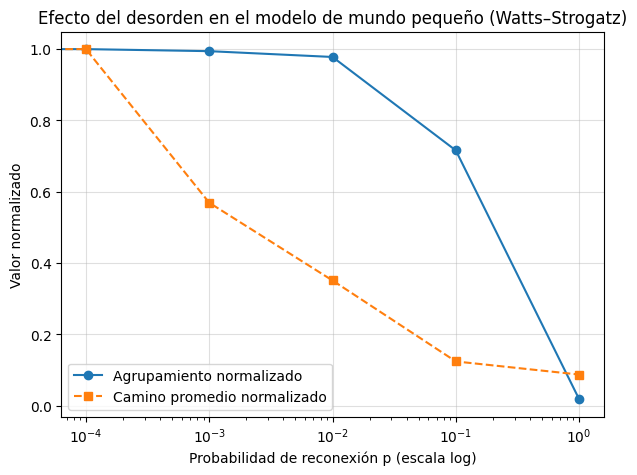

In [6]:
C_norm = np.array(C_vals) / C_vals[0]
L_norm = np.array(L_vals) / L_vals[0]

plt.figure(figsize=(7,5))
plt.plot(ps, C_norm, 'o-', label='Agrupamiento normalizado')
plt.plot(ps, L_norm, 's--', label='Camino promedio normalizado')
plt.xscale('log')
plt.xlabel('Probabilidad de reconexión p (escala log)')
plt.ylabel('Valor normalizado')
plt.title('Efecto del desorden en el modelo de mundo pequeño (Watts–Strogatz)')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

1. Al observar su gráfica, ¿qué métrica (agrupamiento o camino promedio) disminuye más drásticamente
cuando p cambia de 0 a un valor muy pequeño como 0.01?

- La métrica que disminuye más drásticamente cuando p pasa de 0 a 0.01 es la longitud de camino promedio. En nuestras corridas para n=500 y k=6 observamos que el camino promedio cae de ~42 a ~14.8 entre p=0 y p=0.01 lo cual consideramos que se puede representar como una reducción cercana al 65%, mientras que el coeficiente de agrupamiento apenas baja (de ~0.60 a ~0.586, ≈2% de reducción). Por tanto, incluso un pequeño recableado produce una caída pronunciada en las distancias típicas sin destruir la estructura local de agrupamiento.

<br>

2. ¿Existe una región donde la red mantiene alto agrupamiento pero baja longitud promedio?

- Consideramos que sí existe una región de 'mundo pequeño' donde el agrupamiento sigue siendo alto pero la longitud de camino es baja. Con valores pequeños de p (por ejemplo p ≈ 0.001–0.01) la mayoría de los triángulos y conexiones locales permanecen, conservando un alto clustering mientras que las pocas aristas recableadas actúan como atajos que reducen drásticamente la distancia típica entre nodos. Esta coexistencia representa alto clustering + baja distancia promedio.

<br>


3. ¿Qué implica este resultado sobre las redes reales?

- Para redes reales esto significa que introducir o eliminar un pequeño número de enlaces 'puente' entre comunidades puede cambiar mucho la rapidez con la que se propaga información, contagio o fallas esto sin llegar alterar las estructuras locales. Basicamente hace que sistemas socio‑técnicos sean  sensibles a enlaces intercomunitarios como políticas que interrumpen o vigilen estos puentes por ejemplo, controlar movilidad entre regiones, vacunación focalizada, o diseño de redundancias en donde pueden tener un efecto desproporcionado en frenar contagios o mejorar resiliencia, mientras que preservar la conectividad local mantiene la cohesión comunitaria y funcionalidad.

### **Referencias**

1. Las redes de Barabasi-Albert ¡No son un buen ejemplo de redes libres de escala! - Medium. (s. f.). https://medium.com/@JuanEnredado/las-redes-de-barabasi-albert-no-son-un-buen-ejemplo-de-redes-libres-de-escala-1abbd0aca529

2. Scale-free networks, a controversial topic solved by extreme mathematics – The Network Pages. (s. f.). https://www.networkpages.nl/scale-free-networks-a-controversial-topic-properly-solved-by-extreme-mathematics/

